In [12]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from backend import osaka_backend, transpiler_real_backend

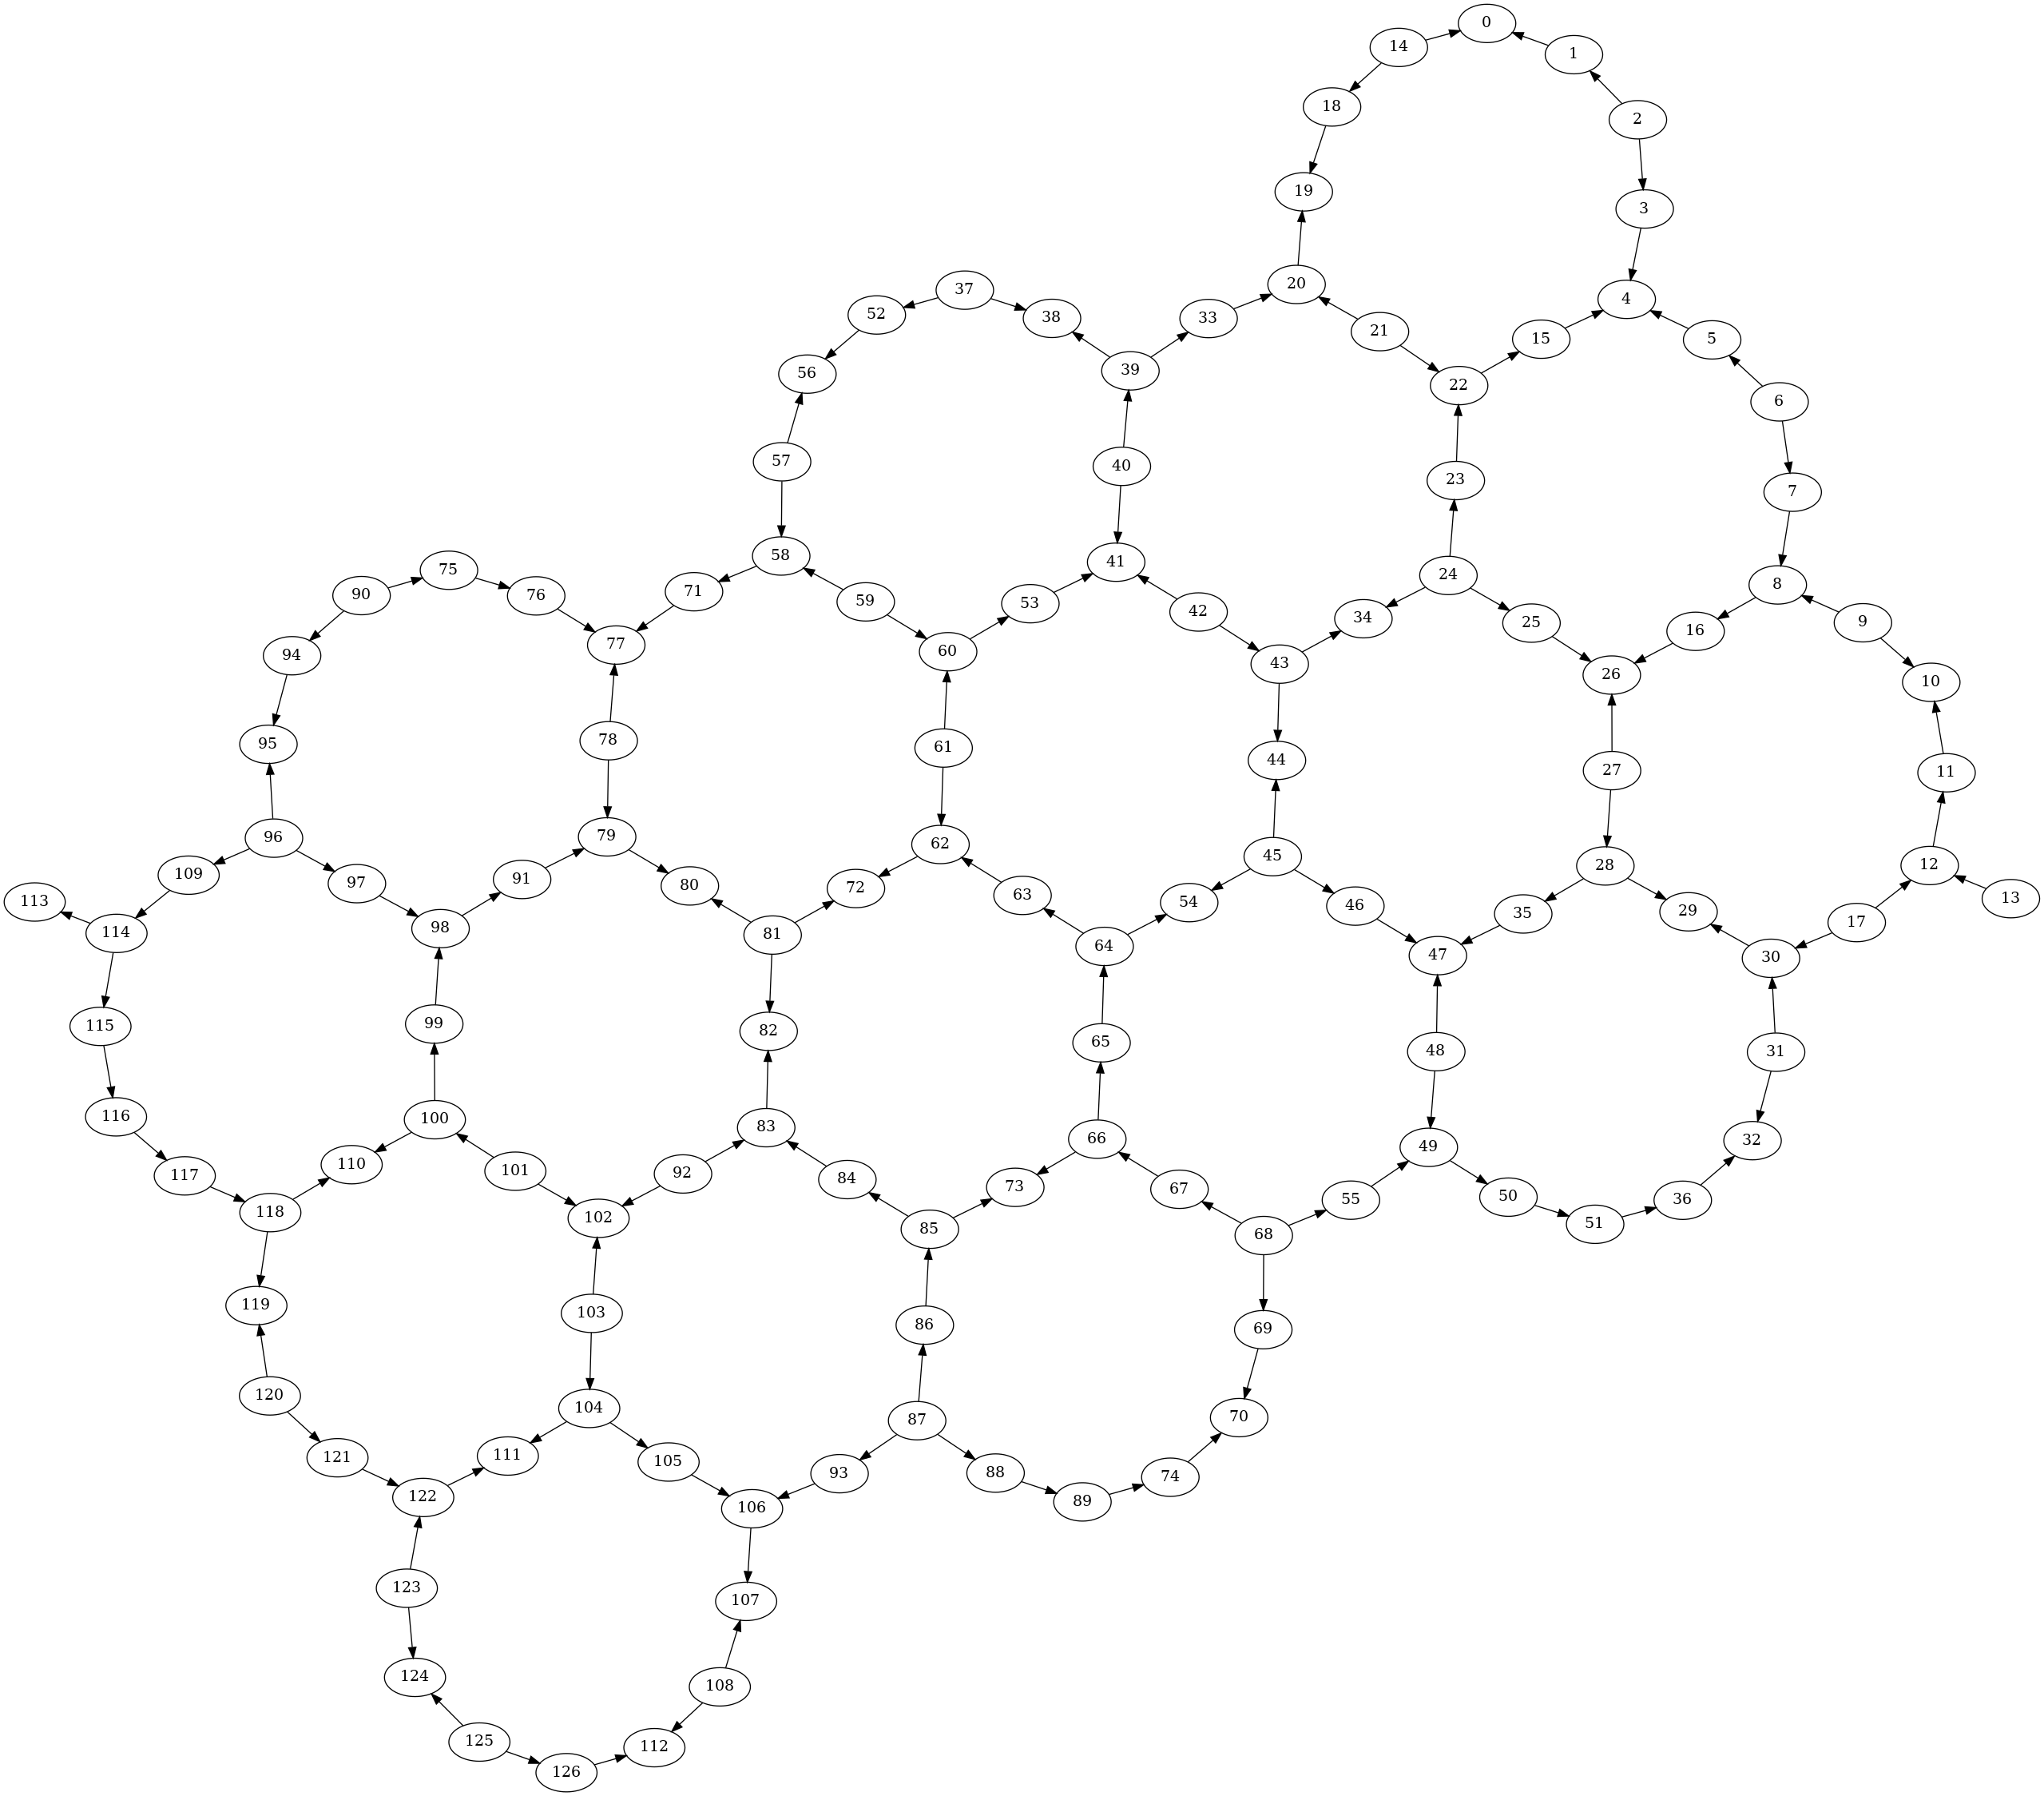

In [10]:
osaka_backend.coupling_map.draw()

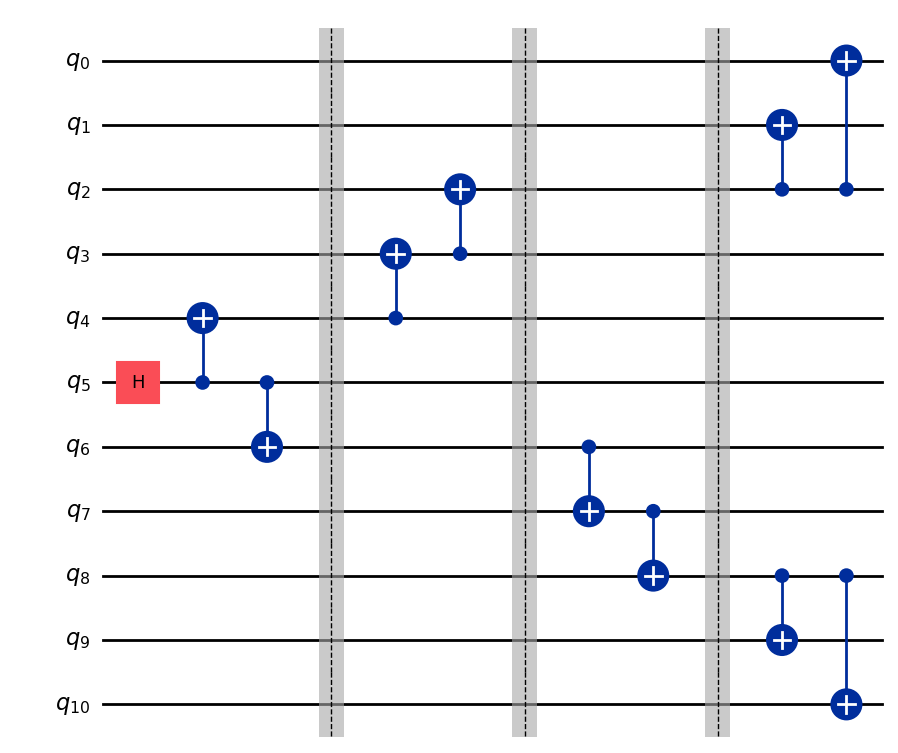

<IPython.core.display.Latex object>

In [11]:
ghz = QuantumCircuit(11)
ghz.h(5)
ghz.cx(5,4)
ghz.cx(5,6)

ghz.barrier()

ghz.cx(4,3)
ghz.cx(3,2)

ghz.barrier()

ghz.cx(6,7)
ghz.cx(7,8)

ghz.barrier()

ghz.cx(2,1)
ghz.cx(2,0)

ghz.cx(8,9)
ghz.cx(8,10)


display(ghz.draw('mpl'))
Statevector(ghz).draw('latex')

In [14]:
def get_final_depth(transpiler, qc, draw=True):
    transpiled = transpiler.run(qc)
    print('final depth: ', transpiled.depth())
    if(draw):
        display(transpiled.draw('mpl', idle_wires=False))

final depth:  44


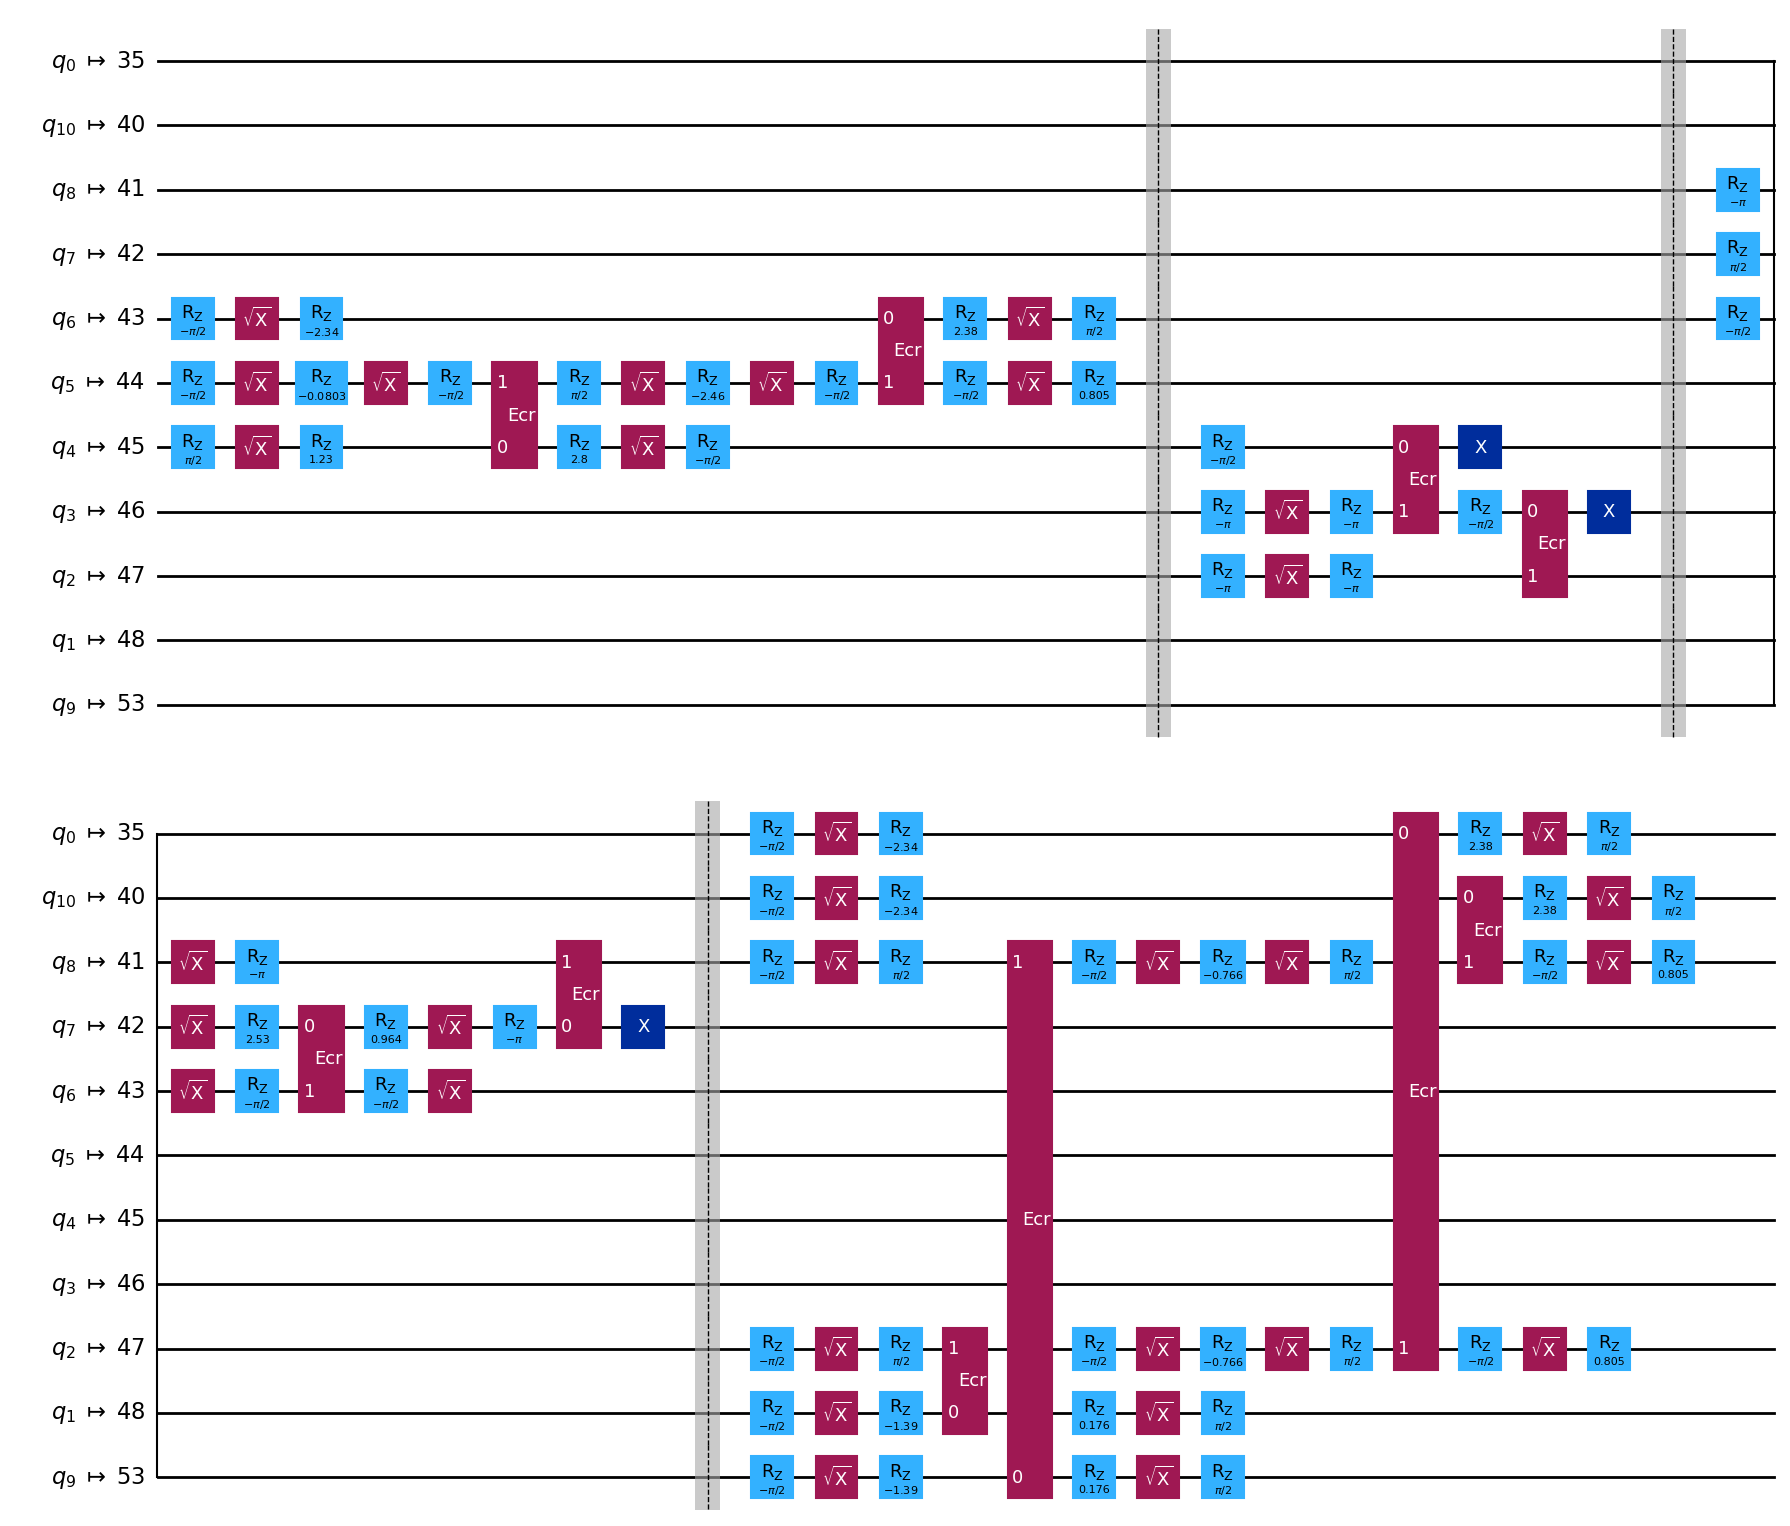

In [15]:
get_final_depth(transpiler_real_backend, ghz)

In [16]:
def top_bottom(qc, top, bottom, n):
    if(top-1 >= 0):
        qc.cx(top, top-1)
        top -= 1
        
    if(bottom+1 < n):
        qc.cx(bottom, bottom+1)
        bottom += 1

    return top, bottom

def two_top(qc, top):
    for _ in range(2):
        if(top-1 < 0):
            break

        qc.cx(top, top-1)
        top-=1
    return top

def two_bottom(qc, bottom, n):
    for _ in range(2):
        if(bottom+1 >= n):
            break

        qc.cx(bottom, bottom+1)
        bottom+=1
    return bottom

def two_top_same_qubit(qc, top):
    count = 0
    for i in range(1,3):
        if(top-i < 0):
            break
        qc.cx(top,top-i)
        count += 1
    return top-count

def two_bottom_same_qubit(qc, bottom, n):
    count = 0
    for i in range(1, 3):
        if(bottom+i >= n):
            break
            
        qc.cx(bottom,bottom+i)
        count += 1
    return bottom+count

def create_ghz(n, insert_barriers=True):
    sup_i = top = bottom = n//2
    
    if(n <= 0):
        return None

    qc = QuantumCircuit(n)    
    qc.h(sup_i)

    if(n == 1):
        return qc
        
    while (top != 0 and bottom != n-1):
        top, bottom = top_bottom(qc, top, bottom, n)

        if(insert_barriers):
            qc.barrier()

        top = two_top(qc, top)
        bottom = two_bottom(qc, bottom, n)
        
        if(insert_barriers):
            qc.barrier()

        top = two_top_same_qubit(qc, top)
        bottom = two_bottom_same_qubit(qc, bottom, n)
            
    return qc

In [17]:
def create_dummy_ghz(n):
    sup_i = n//2
    qc = QuantumCircuit(n)
    qc.h(sup_i)
    for i in range(sup_i, 0, -1):
        qc.cx(i, i-1)
    for i in range(sup_i, n-1):
        qc.cx(i, i+1)
    return qc

In [19]:
ghz_2 = create_ghz(100)
get_final_depth(transpiler_real_backend, ghz_2, draw=False)

final depth:  1459


In [20]:
dummy_2 = create_dummy_ghz(100)
get_final_depth(transpiler_real_backend, dummy_2, draw=False)

final depth:  233
